# Instructions for the adjudicator package

A user guide for the adjudicator module of the RoganBot package.

## Setup

Only run this cell once.

In [1]:
import glob, os
os.chdir('../')  # Set working directory to main folder.

import adjudicator.game as gm

## Available variants

Variants are stored as .json files in the 'variants' folder. Each variant is associated with a map, with maps being stored as .json files in the 'maps' folder. A map may be associated with several variants.

At the time of this writing, there are three available variants, and two available maps. The availabla variants are:

1. Classic: The standard seven player version of Diplomacy.

2. ClassicFvA: The 1v1 version of Diplomacy including only France and Austria from the standard map.

3. RPS: A 1v1 version played on a map with three regions; equivalent to a game of Rock-Paper-Scissors. (This variant is included mainly for testing purposes.)

In [2]:
print(glob.glob('variants/*.json'))
print(glob.glob('maps/*.json'))

['variants/RPS.json', 'variants/Classic.json', 'variants/ClassicFvA.json']
['maps/RPS.json', 'maps/Classic.json']


## Loading a game.

You start a game by initiating an instance of the gm.Game class, with the name of the variant as the sole parameter. The name of the variant is the same as the name of the .json file.

Use the print function to get an overview of the current state of the game.

In [3]:
game = gm.Game('RPS')
print(game)

Game variant: RPS.
Game map: RPS.
Season: Pregame.


The game is currently in a _Pregame_ phase. Starting units and home supply centers has not been loaded into the game at this time. The variant and the map has been loaded, and their _static_ information may be accessed with the `display()` method of the gm.Game class.

The RPS variant is played on the RPS map. There are three provinces, all of which are supply centers. As you might conclude from the names of the provinces (visible below), the game plays out in West Africa.

For future reference, we list also the standard abbreviations of the province names.

In [4]:
print('Provinces:')
game.display('provinces')
print('\nSupply centers:')
game.display('supply centers')
print('\nAbbreviations:')
game.display('abbreviations')

Provinces:
['Conakry', 'Monrovia', 'Freetown']

Supply centers:
['Conakry', 'Monrovia', 'Freetown']

Abbreviations:
- move
S support
C convoy
H hold
B build
D disband
R retreat
A army
F fleet
St Saint
destroy disband
Con Conakry
Mon Monrovia
Fre Freetown


## Starting a game
You start the game with the `start()` method. This will set up home centers and units in starting positions. This _dynamic_ information may also be accessed via the `display()` method.

In [5]:
game.start()

print('Season:')
game.display('season')
print('\nUnits:')
game.display('units')

Season:
Diplomacy in Spring 1990.

Units:
Guinean Army in Conakry.
Liberian Army in Monrovia.


Here is the full list of options for the display function:

In [6]:
game.display('options')

{'units', 'variant', 'map', 'order archive', 'options', 'orders', 'position archive', 'provinces', 'center counts', 'supply centers', 'centers', 'season', 'abbreviations'}


## Entering orders
At the beginning of each face, a list of default orders is generated. For the diplomacy phase, the default order for each unit is a Hold order. 

In [7]:
game.display('orders')

Guinean Army in Conakry holds [unresolved].
Liberian Army in Monrovia holds [unresolved].


The orders are marked as unresolved, as the phase has not yet been adjudicated.

You enter orders as strings using the `order()` method of the `gm.Game` class. You can also enter a list of orders. 

The input interface works according to the following principle. It will first try to identify, from keywords, what order is begin inputted. It does so on a first-seen basis; excess information, which would render an order invalid in most circumstances, is typically ignored. In the diplomacy phase, an order is indexed by the unit it is given to. Once the interface has identifiead the unit, it will replace the old order of the unit, with the new order.

The interface accept anything it can interpret as an _well-defined_ order. Some _illegal_ orders are well-defined, in this sense, and are therefor accepted. Other illegal orders are not well-defined, and are therefor not accepted. And to repeat: if an order is refused, then the previous order given to unit in question will not be discarded.

In [8]:
game.order('Army Conakry move to Monrovia.')
game.order('Army Monrovia move to Freetown.')
game.display('orders')

Guinean Army in Conakry move to Monrovia [unresolved].
Liberian Army in Monrovia move to Freetown [unresolved].


You can also enter order using the standard abbreviations.

In [9]:
game.order(['A Con H.', 'A Mon - Con.'])
game.display('orders')

Guinean Army in Conakry holds [unresolved].
Liberian Army in Monrovia move to Conakry [unresolved].


As long as you enter orders in any of the standard formats, the interface should not cause any trouble. That said, please check consistency with any possible house rules (using `game.display('orders')`) before adjudicating. 

## The Adjudication
Once all orders are in, you can adjudicate the game using the `adjudicate()` method.

In [10]:
game.adjudicate()
print(game)

Game variant: RPS.
Game map: RPS.
Season: Diplomacy in Fall 1990.


As you can see, we have now moved in to the Fall season of 1990.

Displaying orders, at this point, will display the list of default order for the Fall turn. If you wish to see the outcome of the Spring adjudication, then you have to look inte the order archive.

In [11]:
game.display('order archive', 0)

['Guinean Army in Conakry holds.', 'Liberian Army in Monrovia move to Conakry (fails).']


The order archive has two entries at this point. The second entry is for the 'Retreat' phase of Spring season of 1990. Since no units was forced to reateat (indeed, retreats are impossible in the RPS variant), this entry is an empty list.

Since there were no retreats, the game moved on automatically to the Fall diplomacy phase. For any phase, if there are no expected orders, the game will move on automatically.

Failed orders are marked with a '(fails)' tag, while successful orders are not. In difference to some other adjudicators, orders belonging to units which are forced to retreat are not marked. This is since being forced to retreat is a property of the unit, and not of the order.

## Rolling back
If something went wrong (probably because an order was entered incorrectly), then you can roll back to the previous turn using the rollback() method. You cannot roll back to the 'Pregame' phase. You'll have to manually rollback past also retreat phases where no retreats took place.

In [12]:
game.rollback()
game.rollback()
print(game)

Game variant: RPS.
Game map: RPS.
Season: Diplomacy in Spring 1990.


Rolling back will not overwrite the orders you entered for the last phase.

## Graphics
There is a minimalistic graphics modul, to display the current position of the board. There is, at the time of this writing, no mdule to display the outcome of the previous adjudication. _This might change in the future._ 

You display the current position by `show()`.

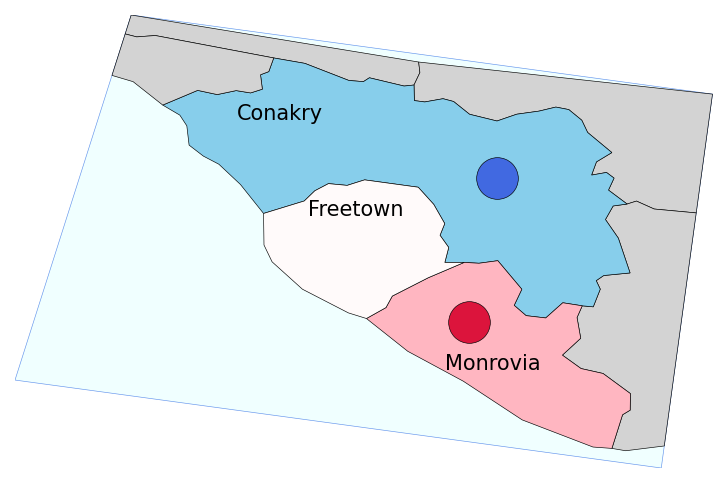

In [13]:
game.show()

['Guinean Army in Conakry move to Freetown (succeeds).', 'Liberian Army in Monrovia move to Conakry (succeeds).']


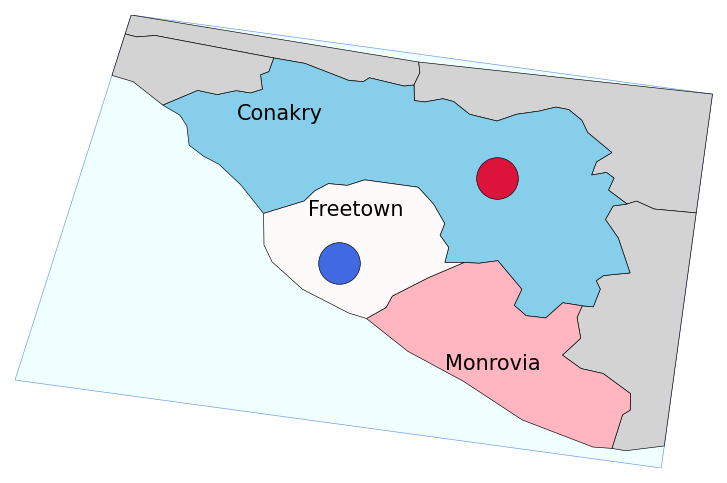

In [14]:
game.order(['A Con - Fre.', 'A Mon - Con.'])
game.adjudicate()
game.display('order archive', 0)
game.show()

In [15]:
game.display('centers')

Guinea: {'Conakry'}
Liberia: {'Monrovia'}


Game won by Liberia.
['Guinean Army in Freetown move to Monrovia (fails).', 'Liberian Army in Conakry move to Monrovia (fails).']


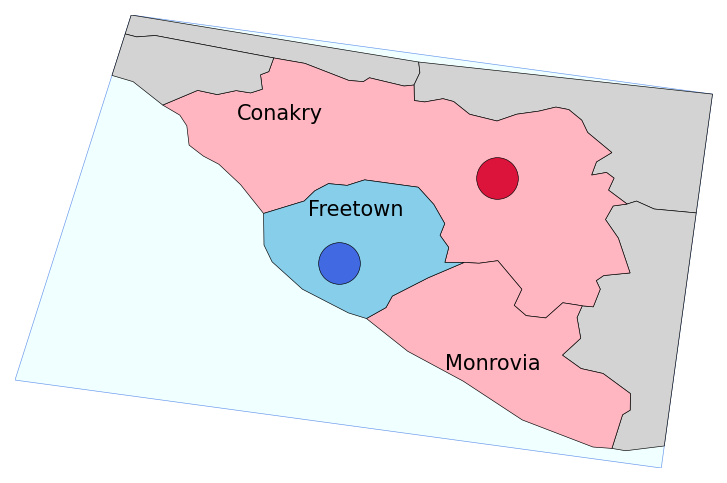

In [16]:
game.order(['A Con - Mon.', 'A Fre - Mon.'])
game.adjudicate()
game.display('order archive', 2)
game.show()

## Support, Convoys, Retreats, Builds, Disbands 
Let us start a game of the Classic variant.

In [17]:
game = gm.Game('Classic')
game.start()

The list of abbreviations recognized by the interface can be viewed by `game.display('abbreviations')`; remember that different editions of the game employs different abbreviations.

Let us examplify a support order. In this scenario, France supports himself into Burgundy, fending of the German unit in Munich which.

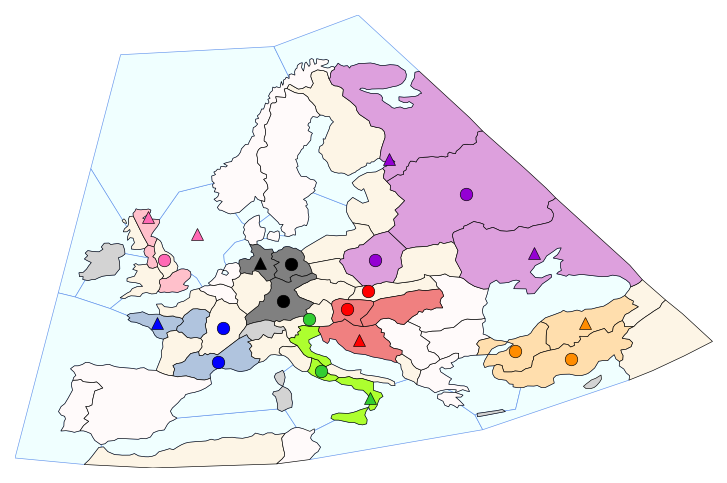

In [18]:
game.order(['A Bud - Gal'])
game.order(['F Lon - NTH', 'A Lvp - Yor'])
game.order(['A Par - Bur', 'A Mar S Par - Bur'])
game.order(['A Mun - Bur'])
game.order(['A Ven - Tyr'])
game.adjudicate()
game.show()

Let us comment on the minimalistic graphics module. Only supply centers are colored, as this elimintes the need to mark supple center provinces by a 'dot.' Neutral supply centers are colored in white. Gray areas are impassable. Names of provinces are not printed.

To give a second example of a support order, the French unit in Burgundy will support the Italian unit in Tyroli into Munich. Notice that foreign powers need not be named.

To examplify a convoy, we also order the English army in Yorkshire to move to Norway. Notice that 'via convoy' must be specified for the move order. If not, the move order would fail. The standard abbreviation 'C' for convoy is accepted.

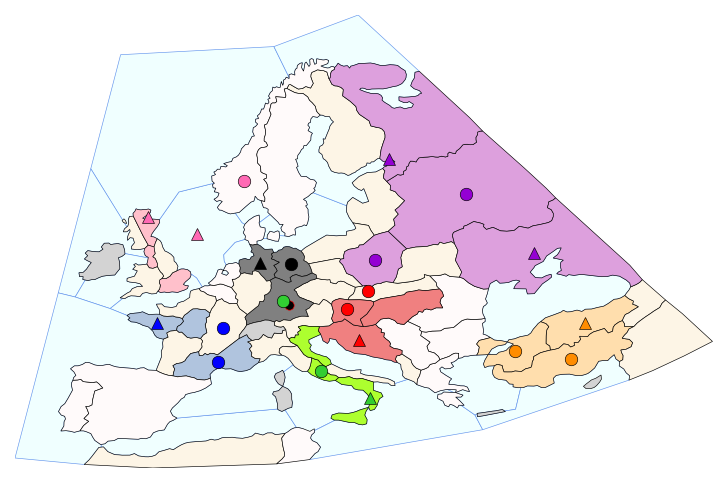

In [19]:
game.order(['A Yor - Nwy via C', 'F NTH C Yor - Nwy'])
game.order(['A Tyr - Mun'])
game.order(['A Bur S A Tyr - Mun'])
game.adjudicate()
game.show()

The german unit in Munich is forced to retreat. The standard retreat order to Disband. Retreat orders are entered just as regular move orders. Notice that the interface will accept an order for Munich to retrat to Tyrolia, as it is a well-defined order. As retreating to Tyrolia in this situation is illegal, the unit in Munich would be disbanded if such an order was given. Let us order the unit to retreat to Bohemia.

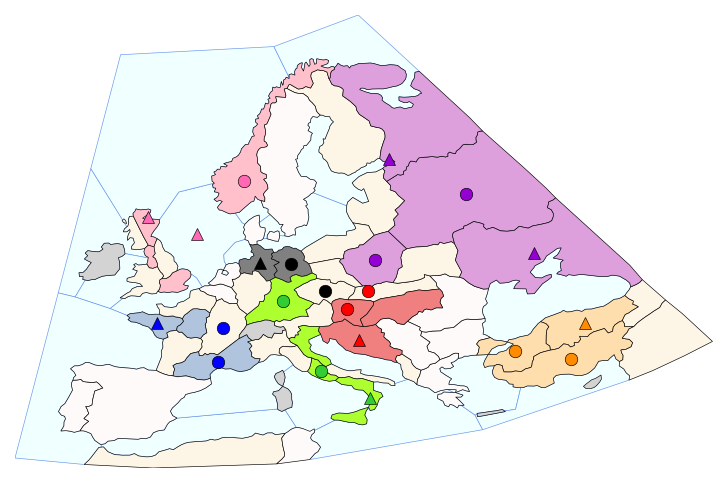

In [20]:
game.order('A Mun - Boh')
game.adjudicate()
game.show()

This takes us to the adjustment (or, build) phase. In the build phase, orders are not given to units, but they are given to powers. Hence, index order by the powers. Since a power may have more than one adjustment order to give, a second index (i.e., a _numbering_) of the orders is necessary. Any entered order must identify both the power _and the number_ of the order.

In [21]:
game.display('orders')

English build no. 1 is postponed.
German disband no. 1 is by default.
Italian build no. 1 is postponed.


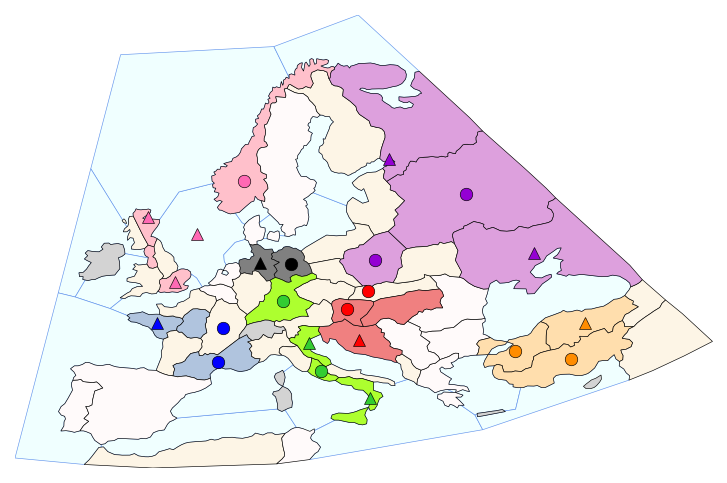

In [22]:
game.order(['England build 1 Fleet London', 'Germany disband 1 Army Bohemia', 'Italy build 1 Fleet Venice'])
game.adjudicate()
game.show()

We have now arrived in Spring 1902, which concludes this tutorial. A couple of sample games are provided in the current folder.